In [1]:
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import random
import math, json
from tqdm import tqdm
pd.options.plotting.backend = "plotly"

In [9]:
df = pd.read_csv('../data/user.csv')

In [6]:
def parse_profile(row):
    return json.loads(row['profile'])

def parse_userPoint(row):
    return json.loads(row['userPoint'])

with open('../data/China_Division.json') as fp:
    province_code = json.load(fp)

def parse_province(row):
    code = list(row['profile']['province'].values())[0]
    if code == 0:
        return 'Unknown'
    return province_code.get(code)

In [10]:
df.drop(['adValid', 'bindings', 'code', 'identify', 'mobileSign', 'pcSign', 'peopleCanSeeMyPlayRecord'], axis=1, inplace=True)
hotUser = df[df['userPoint'].notna()]
hotUser

,_id,createDays,createTime,level,listenSongs,profile,userPoint
0,6048c4c39c235953997ae2e7,439,1577458418023,7,1047,"{ ""avatarDetail"" : null, ""mutual"" : false, ""fo...","{ ""userId"" : { ""$numberInt"" : ""2074360769"" }, ..."
1,6048c4c39c235953997ae2e8,1895,1451733410692,8,4339,"{ ""avatarDetail"" : null, ""description"" : """", ""...","{ ""userId"" : { ""$numberInt"" : ""119611475"" }, ""..."
2,6048c4c39c235953997ae2e9,1580,1478931019496,7,2620,"{ ""avatarDetail"" : null, ""description"" : """", ""...","{ ""userId"" : { ""$numberInt"" : ""360627408"" }, ""..."
3,6048c4c39c235953997ae2ea,126,-1,4,171,"{ ""avatarDetail"" : null, ""mutual"" : false, ""fo...","{ ""userId"" : { ""$numberLong"" : ""3960558510"" },..."
4,6048c4c39c235953997ae2eb,1086,1521609033068,5,853,"{ ""avatarDetail"" : null, ""vipType"" : { ""$numbe...","{ ""userId"" : { ""$numberInt"" : ""1405474767"" }, ..."
...,...,...,...,...,...,...,...
527492,608aa89a4c41365ca4a32789,1406,1498229776875,7,2746,"{ ""avatarDetail"" : null, ""vipType"" : { ""$numbe...","{ ""userId"" : { ""$numberInt"" : ""514175307"" }, ""..."
527493,608aa89a4c41365ca4a3278a,1215,-1,9,8611,"{ ""avatarDetail"" : null, ""vipType"" : { ""$numbe...","{ ""userId"" : { ""$numberInt"" : ""484946236"" }, ""..."
527494,608aa89a4c41365ca4a3278b,2047,1442918278190,8,3105,"{ ""avatarDetail"" : null, ""vipType"" : { ""$numbe...","{ ""userId"" : { ""$numberInt"" : ""93541574"" }, ""b..."
527495,608aa89a4c41365ca4a3278c,1521,1488332670176,9,13843,"{ ""avatarDetail"" : null, ""vipType"" : { ""$numbe...","{ ""userId"" : { ""$numberInt"" : ""429923870"" }, ""..."


In [11]:
hotUser['profile'] = hotUser.apply(lambda row: parse_profile(row), axis=1)
hotUser['userPoint'] = hotUser.apply(lambda row: parse_userPoint(row), axis=1)

<ipython-input-11-683ab44c67c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotUser['profile'] = hotUser.apply(lambda row: parse_profile(row), axis=1)
<ipython-input-11-683ab44c67c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotUser['userPoint'] = hotUser.apply(lambda row: parse_userPoint(row), axis=1)


In [12]:
from datetime import datetime

In [13]:
def get_birthday(row):
    try:
        return datetime.fromtimestamp(row['birthday'] / 1000)
    except Exception as e:
        return 0

def get_createtime(row):
    try:
        return datetime.fromtimestamp(row['createTime'] / 1000)
    except Exception as e:
        return 0

In [14]:
bd = hotUser.copy()
bd['birthday'] = bd.apply(lambda x: int(list(x['profile']['birthday'].values())[0]), axis=1)
bd['birthday'] = bd.apply(lambda x: get_birthday(x), axis=1)
bd = bd.loc[bd['birthday'] != 0]
bd['birth_year'] = bd.apply(lambda x: x['birthday'].year, axis=1)
bd = bd.loc[bd['birth_year'] < 2010]

In [15]:
bd['createTime'] = bd.apply(lambda x: get_createtime(x), axis=1)
bd = bd.loc[bd['createTime'] != 0]
bd['create_month'] = bd.apply(lambda x: x['createTime'].strftime('%Y-%m'), axis=1)
bd

,_id,createDays,createTime,level,listenSongs,profile,userPoint,birthday,birth_year,create_month
0,6048c4c39c235953997ae2e7,439,2019-12-27 22:53:38.023000,7,1047,"{'avatarDetail': None, 'mutual': False, 'follo...","{'userId': {'$numberInt': '2074360769'}, 'bala...",2006-12-28 21:27:27.430000,2006,2019-12
4,6048c4c39c235953997ae2eb,1086,2018-03-21 13:10:33.068000,5,853,"{'avatarDetail': None, 'vipType': {'$numberInt...","{'userId': {'$numberInt': '1405474767'}, 'bala...",2002-12-24 18:11:29.045000,2002,2018-03
5,6048c4c49c235953997ae2ec,1170,2017-12-27 18:57:25.705000,7,2737,"{'avatarDetail': None, 'mutual': False, 'follo...","{'userId': {'$numberInt': '1323129394'}, 'bala...",2005-11-26 09:25:42.091000,2005,2017-12
7,6048c4c49c235953997ae2ee,2995,2012-12-28 15:29:02.130000,9,13286,"{'avatarDetail': {'userType': None, 'identityL...","{'userId': {'$numberInt': '9003'}, 'balance': ...",1990-01-01 00:00:00,1990,2012-12
9,6048c4c59c235953997ae2f0,1257,2017-10-01 11:43:07.701000,6,750,"{'avatarDetail': None, 'vipType': {'$numberInt...","{'userId': {'$numberInt': '606188208'}, 'balan...",2002-09-20 12:10:10.168000,2002,2017-10
...,...,...,...,...,...,...,...,...,...,...
527484,608aa8994c41365ca4a32781,1256,2017-11-21 15:17:30.258000,5,411,"{'avatarDetail': None, 'nickname': '沈漱石', 'vip...","{'userId': {'$numberInt': '352444084'}, 'balan...",1999-06-16 21:07:03.982000,1999,2017-11
527487,608aa8994c41365ca4a32784,1522,2017-02-28 19:36:37.646000,7,2080,"{'avatarDetail': None, 'description': '', 'use...","{'userId': {'$numberInt': '428799117'}, 'balan...",1998-10-23 12:30:54.023000,1998,2017-02
527490,608aa89a4c41365ca4a32787,1375,2017-07-25 09:50:12.297000,7,2350,"{'avatarDetail': None, 'nickname': '十六要早睡', 'v...","{'userId': {'$numberInt': '549774932'}, 'balan...",2002-10-21 00:00:00,2002,2017-07
527491,608aa89a4c41365ca4a32788,1913,2016-02-03 12:05:51.357000,8,6146,"{'avatarDetail': None, 'nickname': 'lemonthree...","{'userId': {'$numberInt': '130755589'}, 'balan...",1993-10-29 00:00:00,1993,2016-02


In [16]:
bd = bd.sample(n=130000)

In [17]:
bd.groupby('create_month').agg({'_id': 'count'})

,_id
create_month,
2012-12,8
2013-01,70
2013-02,69
2013-03,66
2013-04,130
...,...
2020-11,804
2020-12,452
2021-01,627


In [18]:
bd.groupby('create_month').agg({'_id': 'count'}).reset_index()

,create_month,_id
0,2012-12,8
1,2013-01,70
2,2013-02,69
3,2013-03,66
4,2013-04,130
...,...,...
95,2020-11,804
96,2020-12,452
97,2021-01,627
98,2021-02,518


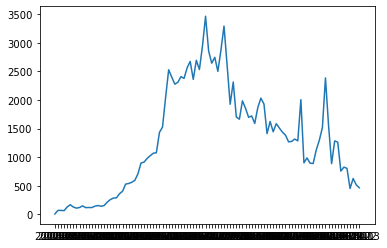

In [26]:
from matplotlib.pyplot import plot as plt

plt(bd.groupby('create_month').agg({'_id': 'count'}))

In [19]:
bd.groupby('create_month').agg({'_id': 'count'}).plot.bar()

In [23]:
ucc = bd.groupby('create_month').agg({'_id': 'count'}).reset_index()
ucc.columns = ['create_month', 'count']

In [22]:
bd.groupby('birth_year').agg({'_id': 'count'}).plot.bar()

In [ ]:
byu = bd.groupby('birth_year').agg({'_id': 'count'}).reset_index()
byu.columns = ['birth_year', 'count']
ucc.to_csv('../data/plot_data/user_birth_year_count.csv', index=False)

In [26]:
from tqdm import tqdm

In [27]:
hotUser['province_name'] = hotUser.apply(lambda row: parse_province(row), axis=1)

<ipython-input-27-348433af1c09>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
province_count = hotUser['province_name'].value_counts()
data = list(zip(province_count.index, province_count))

In [44]:
pc = province_count.to_frame().reset_index()
pc.columns = ['province', 'count']
pc.to_csv('../data/plot_data/province_count.csv', index=False)

In [32]:
bd.groupby('level').agg({'_id': 'count'}).plot.bar()

In [34]:
user_level_count = bd.groupby('level').agg({'_id': 'count'}).reset_index()
user_level_count.columns = ['level', 'count']
user_level_count

,level,count
0,0,3346
1,1,2800
2,2,1219
3,3,2230
4,4,3048
5,5,6839
6,6,16473
7,7,37276
8,8,37126
9,9,16709


In [35]:
user_level_count.to_csv('../data/plot_data/user_level_count.csv', index=False)

In [24]:
map=Map()
map.add("", data, "china")
map.set_global_opts(
    title_opts=opts.TitleOpts(title="各省市人口数", subtitle="数据来源：中国统计年鉴（万人）", pos_right="center", pos_top="5%"),
    visualmap_opts=opts.VisualMapOpts(max_=12000),
    ) 
map.render_notebook()

In [42]:
bd['gender'] = bd.apply(lambda x: int(list(x['profile']['gender'].values())[0]), axis=1)

bd = bd.loc[bd['gender'] != 3]

d = {0: '未知', 1: '男性', 2: '女性'}
bd['gender'] = bd.apply(lambda x: d[x['gender']], axis=1)

gender_count = bd.groupby(['gender']).agg({'_id': 'count'}).reset_index()
gender_count.columns = ['gender', 'count']
gender_count

,gender,count
0,女性,50886
1,未知,8064
2,男性,71049


In [44]:
import plotly.express as px
fig = px.pie(gender_count, values='count', names='gender', title='Population of European continent')
fig.show()

In [45]:
gender_count.to_csv('../data/plot_data/user_gender_count.csv', index=False)

In [38]:
bd.iloc[0]['profile']

{'avatarDetail': None,
 'accountStatus': {'$numberInt': '0'},
 'province': {'$numberInt': '210000'},
 'avatarUrl': 'http://p1.music.126.net/QUFY2A1jPBedoeF858WQvg==/109951164265639672.jpg',
 'userType': {'$numberInt': '0'},
 'authStatus': {'$numberInt': '0'},
 'detailDescription': '',
 'experts': {},
 'expertTags': None,
 'city': {'$numberInt': '210200'},
 'defaultAvatar': False,
 'backgroundImgId': {'$numberLong': '109951164265643140'},
 'backgroundUrl': 'http://p1.music.126.net/P6jQQkRIuAINJMRBj5QXgg==/109951164265643135.jpg',
 'avatarImgId': {'$numberLong': '109951164265639680'},
 'birthday': {'$numberLong': '864316800000'},
 'gender': {'$numberInt': '1'},
 'nickname': '李白不是刺客是诗人',
 'createTime': {'$numberLong': '1459259682581'},
 'djStatus': {'$numberInt': '0'},
 'vipType': {'$numberInt': '0'},
 'followed': False,
 'mutual': False,
 'remarkName': None,
 'backgroundImgIdStr': '109951164265643135',
 'avatarImgIdStr': '109951164265639672',
 'description': '',
 'userId': {'$numberInt':